In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
iris_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df = pd.read_csv(iris_data, names=names)
iris_df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


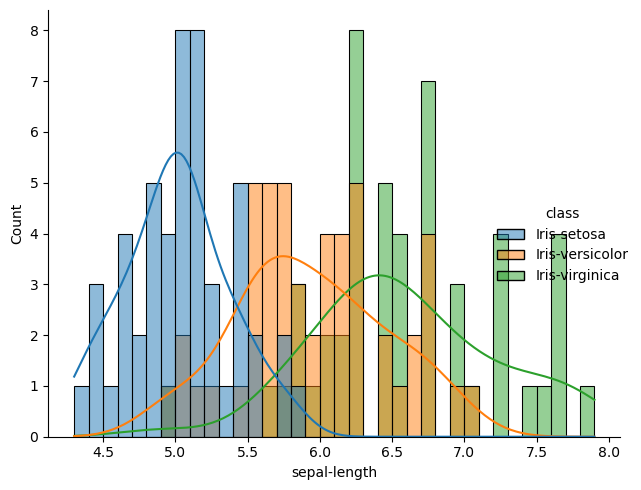

In [3]:
sns.displot(
    data=iris_df,
    x='sepal-length',
    kind='hist',
    bins=int(180/5),
    kde=True,
    # fill=True,
    hue='class'
)
plt.tight_layout();


### Variance

In [4]:
round(iris_df['sepal-length'].var(), 2)

0.69

In [5]:
round(iris_df['sepal-length'].std(), 2)

0.83

In [6]:
round(iris_df['sepal-length'].mean(), 2)

5.84

In [7]:
var_coef = iris_df['sepal-length'].std() / iris_df['sepal-length'].mean()
var_coef

0.14171125977944032

### Simple random sampling

In [8]:
simple_random = iris_df.sample(frac=0.5)
simple_random.head()

,sepal-length,sepal-width,petal-length,petal-width,class
46,5.1,3.8,1.6,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor


In [9]:
simple_random['sepal-length'].var(numeric_only=True)

0.8812540540540539

In [10]:
simple_random['sepal-length'].std(numeric_only=True)

0.9387513270584782

In [11]:
var_coef = simple_random['sepal-length'].std() / simple_random['sepal-length'].mean()
var_coef

0.1581454391944876

### Summarize variance in a table for iris numerical values.

In [12]:
import janitor

In [13]:
stats = {
    'columns': iris_df.select_dtypes('float').clean_names(case_type='snake').columns,
    'variance' : iris_df.select_dtypes('float').sample(frac=0.5).var().to_list(),
    'std' : iris_df.select_dtypes('float').sample(frac=0.5).std().to_list(),
    'var_coef' : lambda df : df.var() / df.mean()
}

stats['var_coef'] = stats['var_coef'](iris_df.select_dtypes('float').sample(frac=0.5)).to_list()

In [14]:
simple_random_stats = pd.DataFrame(stats)
simple_random_stats

,columns,variance,std,var_coef
0,sepal_length,0.751524,0.788240,0.120676
1,sepal_width,0.211723,0.450325,0.061062
2,petal_length,3.171557,1.708001,0.935203
3,petal_width,0.583333,0.760512,0.523326


### Confidence interval

$$
CI = \bar{x} \pm \ z\cdot\frac{s}{\sqrt{n}}
$$

$$
\bar{x}-z\cdot\frac{s}{\sqrt{n}}<\bar{x}<\bar{x}+z\cdot\frac{s}{\sqrt{n}}
$$

The Z value is read from a table in which the z-values for the respective confidence level are plotted. For the **confidence level** of **95%**, i.e., the **z-value** is **1.96**.

$$
CI = \bar{x} \pm \ 1.96\cdot\frac{s}{\sqrt{n}}
$$

Let's suppose we have the following distribution:

In [15]:
np.random.seed(20)
var_1 = np.random.randint(0, 10, 10)
var_2 = var_1 + np.random.normal(0, 1, 10)

In [16]:
var_1, var_2

(array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5]),
 array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
        2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207]))

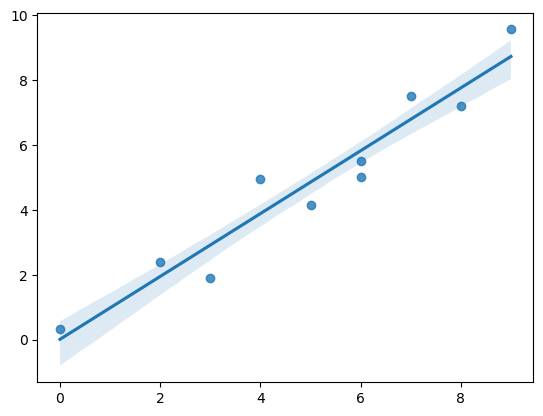

In [17]:
sns.regplot(x=var_1, y=var_2, ci=80);

In [18]:
vacations = pd.DataFrame(list(zip(var_1, var_2)), columns=['vacation_days', 'spent_money'])
vacations

,vacation_days,spent_money
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


Confidence interval using t-student due to data size is below 30, len(df) < 30.

In [19]:
st.t.interval(df=len(vacations)-1, loc=np.mean(vacations), scale=st.sem(vacations), confidence=0.95)

/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

$$
\bar{var_1}-2.85<\bar{var_1}<\bar{var_1}+3.00
$$

$$
\bar{var_2}-6.86<\bar{var_2}<\bar{var_2}+6.99
$$

### Hypothesis tests

In [20]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [21]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Type of tests

**a. t-student distribution.**

$$
SE = \frac{\sigma}{\sqrt{N}}
$$

In [22]:
se_sepal_length = iris_df['sepal_length'].std() / np.sqrt(10)
se_sepal_width = iris_df['sepal_width'].std() / np.sqrt(10)

$$
SED = \sqrt{\frac{{\sigma_1}^2}{N_1} + \frac{{\sigma_2}^2}{N_1}}
$$

In [23]:
sed = np.sqrt((se_sepal_length**2)+(se_sepal_width**2))
sed

0.2959177133340904

### `t-student`

$$
t = \frac{(x_1-x_2)}{\sqrt{\frac{(s_1)^2}{N_1}+\frac{(s_2)^2}{N_2}}}
$$

$$
t = \frac{(x_1-x_2)}{SED}
$$

In [24]:
t_stat = (iris_df.sepal_length.mean() - iris_df.sepal_width.mean()) / sed
t_stat

9.414779428410265

In [25]:
p = ttest_ind(iris_df.sepal_length, iris_df.sepal_width)
p

TtestResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112, df=298.0)

### Z-value testing.

In [26]:
from scipy.stats import norm

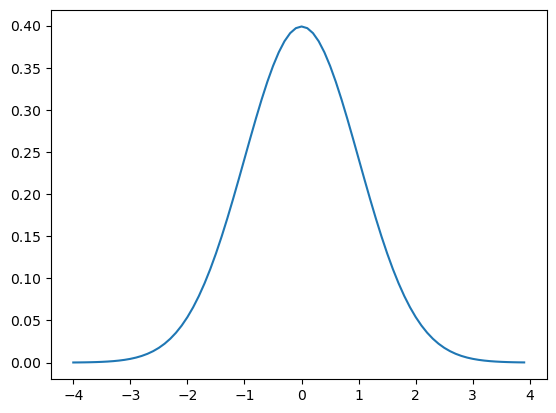

In [27]:
x_axis = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show();

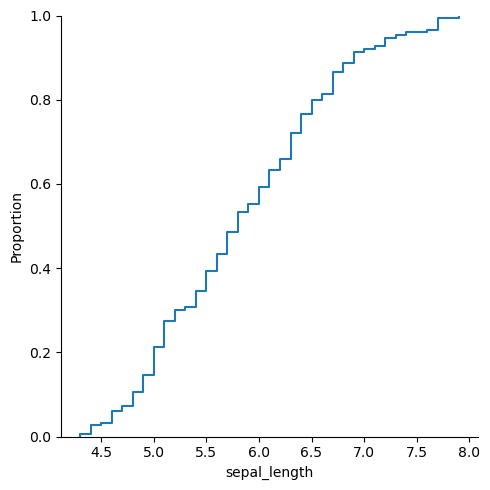

In [28]:
sns.displot(
    data=iris_df.sepal_length,
    kind='ecdf'
);

In [29]:
sepal_length_mean = round(iris_df.sepal_length.mean(), 3)
sepal_length_std = round(iris_df.sepal_length.std(), 3)
print(sepal_length_mean, sepal_length_std)

5.843 0.828


In [30]:
st.norm.cdf((4.5-sepal_length_mean)/sepal_length_std)

0.05240374286136116

### Pearson and ANOVA testing.

In [31]:
iris_df.sepal_length.corr(iris_df.sepal_width)

-0.11756978413300208

In [32]:
st.pearsonr(iris_df.sepal_length, iris_df.sepal_width)

PearsonRResult(statistic=-0.11756978413300205, pvalue=0.15189826071144746)

In [33]:
f_oneway(iris_df.sepal_length, iris_df.sepal_width)

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

### Bootstrapping

It's a resampling method involving **random variable**, commonly used to determine and approximate a normal distribution. This is a really useful method for small or highly biased samples.

In [34]:
import random

In [38]:
bootstrapped_data = np.random.normal(loc = 34, size = 10000) # loc corresponds to our data's mean.
bootstrapped_data

array([35.29508238, 33.67386608, 32.30458418, ..., 34.30225565,
       35.25212103, 33.43855555])

In [39]:
bootstrapped_data.mean()

33.98496402029748

Calculating average age by bootstrapping:

In [54]:
average = [np.mean(random.sample(bootstrapped_data.tolist(), 5)) for i in range(40)]
# average

In [55]:
np.mean(average)

34.03648129082332